In [34]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline


data = pd.read_csv(r"D:\project\WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.info()
data.head()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [35]:
df = data.copy()

df.drop(columns=['customerID'], inplace=True)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)



C:\Users\admin\AppData\Local\Temp\ipykernel_7560\2525732094.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [36]:
print(df.nunique())
df.head()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [37]:
# Бинарные столбцы с 'Yes'/'No'
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Категориальные столбцы для OHE (3+ значений)
categorical_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'
]

# Числовые столбцы 
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Целевая переменная
target_col = 'Churn'


In [38]:
from sklearn.model_selection import train_test_split

# Целевая переменная: преобразуем в 0/1
y = df['Churn'].replace({'Yes': 1, 'No': 0})
X = df.drop(columns=['Churn']) 

# Разделение (например, 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # сохраняет пропорции классов 
)

C:\Users\admin\AppData\Local\Temp\ipykernel_7560\82014725.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df['Churn'].replace({'Yes': 1, 'No': 0})


In [39]:
from sklearn.base import BaseEstimator, TransformerMixin

class YesNoEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return (X == 'Yes').astype(int)  # 'Yes' → 1



In [75]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('binary', YesNoEncoder(), binary_cols),
        ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('numeric', 'passthrough', numeric_cols)  
    ],
    remainder='drop'
)

Recall: 0.767379679144385
Precision: 0.5189873417721519
F1-score: 0.6192017259978425
PR-AUC: 0.6583614700992869


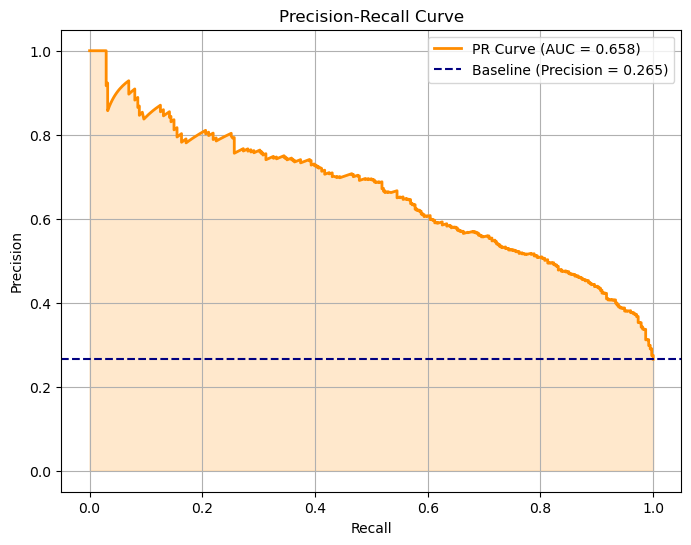

In [83]:
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Создаём пайплайн с CatBoost
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(
        random_state=42,
        class_weights=[1, 3],          
        iterations=300,                
        max_depth=6,                   
        learning_rate=0.05,            
        verbose=0,                     
        eval_metric='Recall'         
    ))
])

# Обучаем модель
pipeline.fit(X_train, y_train)

# Предсказания и вероятности
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Вычисляем Precision-Recall кривую
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

# Выводим метрики
from sklearn.metrics import recall_score, precision_score, f1_score

print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("PR-AUC:", pr_auc)

# Строим график Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR Curve (AUC = {pr_auc:.3f})')
plt.fill_between(recall, precision, alpha=0.2, color='darkorange')

# baseline (random classifier)
plt.axhline(y=np.mean(y_test), color='navy', linestyle='--', label=f'Baseline (Precision = {np.mean(y_test):.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [85]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['Not Churn', 'Churn']))

              precision    recall  f1-score   support

   Not Churn       0.90      0.74      0.81      1035
       Churn       0.52      0.77      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409



💡 Бизнес-эффект

В телекоме recall важнее precision — лучше ошибиться и предложить удержание лояльному клиенту, чем упустить уходящего.
При recall 77% модель помогает удержать ~4/5 потенциальных потерь.
Даже при precision ~0.52 стоимость ложных срабатываний (SMS, email, скидки) низкая по сравнению с потерей клиента.
Recall (Churn): 0.77 → Модель ловит 77% реальных ушедших клиентов.
F1-score (Churn): 0.62 → Хороший баланс между точностью и полнотой.
